In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data= "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
pymaceuticals_df=pd.merge(mouse_drug,clinical_trial, on=["Mouse ID"], how="outer")

len_time=len("Timepoint")


# Display the data table for preview

pymaceuticals_df.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_table=pymaceuticals_df.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)']

tumor_mean=tumor_table.mean()

# Convert to DataFrame
tumor_mean_df=pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df.reset_index(inplace=True)



In [3]:
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=tumor_table.sem()

# Convert to DataFrame
tumor_sem_df=pd.DataFrame(tumor_sem)

# Preview DataFrame
tumor_sem_df.reset_index(inplace=True)
tumor_sem_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [50]:
pivot_table_sem = tumor_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_table_sem.head()
pivot_sem_df=pd.DataFrame(pivot_table_sem)
#pivot_sem_df

In [49]:
# Minor Data Munging to Re-Format the Data Frames

pivot_table = tumor_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_table.head()

pivot_df=pd.DataFrame(pivot_table)
pivot_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


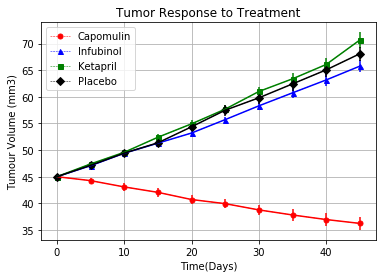

In [57]:
# Generate the Plot (with Error Bars)
x_axis=pivot_df.index.values
y_capomulin=pivot_df["Capomulin"]
y_Infubinol=pivot_df["Infubinol"]
y_Ketapril=pivot_df["Ketapril"]
y_Placebo=pivot_df["Placebo"]

xerr=0.1
yerr=pivot_sem_df["Capomulin"]

fig, ax = plt.subplots()

ax.errorbar(x_axis, y_capomulin, xerr=xerr, yerr=yerr,  color='red')
Capomulin,=plt.plot(x_axis,y_capomulin,color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Infubinol"]
ax.errorbar(x_axis, y_Infubinol, xerr=xerr, yerr=yerr, color='blue')
Infubinol,=plt.plot(x_axis,y_Infubinol,color="blue", marker='^',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Ketapril"]
ax.errorbar(x_axis, y_Ketapril, xerr=xerr, yerr=yerr,  color='green')
Ketapril,=plt.plot(x_axis,y_Ketapril,color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Placebo"]
ax.errorbar(x_axis, y_Placebo, xerr=xerr, yerr=yerr, color='black')
Placebo,=plt.plot(x_axis,y_Placebo,color="black",marker='D', markersize=5, linestyle='--', linewidth=0.5)


ax.set_xlabel('Time(Days)')
ax.set_ylabel('Tumour Volume (mm3)')
ax.set_title('Tumor Response to Treatment')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best")
# Save the Figure
plt.savefig("Images/Tumorvolume.png")
#plt.tight_layout()
plt.show()



## Metastatic Response to Treatment

In [39]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_treat=pymaceuticals_df.groupby(["Drug","Timepoint"])['Metastatic Sites']
meta_mean=meta_treat.mean()

# Convert to DataFrame

meta_df=pd.DataFrame(meta_mean)


# Preview DataFrame
meta_df.reset_index(inplace=True)
meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = meta_treat.sem()

# Convert to DataFrame
meta_sem_df=pd.DataFrame(meta_sem)

# Preview DataFrame
meta_sem_df.reset_index(inplace=True)
meta_sem_df.head()





,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [78]:
#to get the yerr value
pivot_table_meta_sem = meta_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_table_meta_sem.head()
pivot_meta_sem_df=pd.DataFrame(pivot_table_meta_sem)#pivot_meta_sem_df
#pivot_meta_sem_df

In [79]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_meta = meta_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_table_meta.head()

# Preview that Reformatting worked
pivot_meta_df=pd.DataFrame(pivot_table_meta)
pivot_meta_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


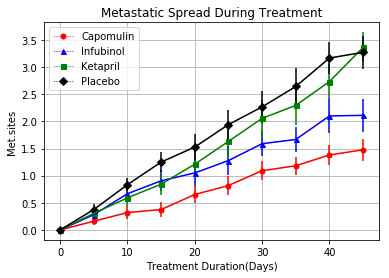

In [59]:
# Generate the Plot (with Error Bars)
x_axis=pivot_df.index.values
y_capomulin=pivot_meta_df["Capomulin"]
y_Infubinol=pivot_meta_df["Infubinol"]
y_Ketapril=pivot_meta_df["Ketapril"]
y_Placebo=pivot_meta_df["Placebo"]
xerr=0.1
yerr=pivot_meta_sem_df["Capomulin"]
fig, ax = plt.subplots()
ax.errorbar(x_axis, y_capomulin, xerr=xerr, yerr=yerr,  color='red')
Capomulin,=plt.plot(x_axis,y_capomulin,color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Infubinol"]
ax.errorbar(x_axis, y_Infubinol, xerr=xerr, yerr=yerr, color='blue')
Infubinol,=plt.plot(x_axis,y_Infubinol,color="blue", marker='^',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Ketapril"]
ax.errorbar(x_axis, y_Ketapril, xerr=xerr, yerr=yerr,  color='green')
Ketapril,=plt.plot(x_axis,y_Ketapril,color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Placebo"]
ax.errorbar(x_axis, y_Placebo, xerr=xerr, yerr=yerr, color='black')
Placebo,=plt.plot(x_axis,y_Placebo,color="black",marker='D', markersize=5, linestyle='--', linewidth=0.5)
ax.set_xlabel('Treatment Duration(Days)')
ax.set_ylabel('Met.sites')
ax.set_title('Metastatic Spread During Treatment')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best")
# Save the Figure
plt.savefig("Images/Metastatic.png")
#plt.tight_layout()
plt.show()


## Survival Rates

In [61]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data=pymaceuticals_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_df=pd.DataFrame(survival_data)


# Preview DataFrame
survival_df.reset_index(inplace=True)
survival_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
total_count = len(pymaceuticals_df["Mouse ID"])
total_count
percentage_mouseId = (survival_df["Mouse ID"]/total_count)*100
percentage_mouseId

In [69]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot = survival_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

survival_pivot_df=pd.DataFrame(survival_pivot)

# Preview the Data Frame
survival_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


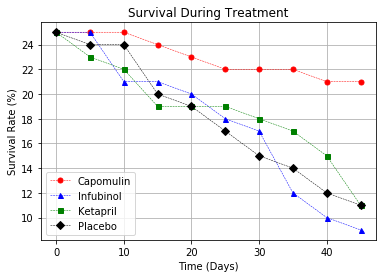

In [80]:
plt.errorbar(survival_pivot_df.index,survival_pivot_df["Capomulin"],
             color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot_df.index,survival_pivot_df["Infubinol"],
             color="blue",marker='^',markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot_df.index,survival_pivot_df["Ketapril"],
             color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(survival_pivot_df.index,survival_pivot_df["Placebo"],
             color="black",marker='D',markersize=5, linestyle='--', linewidth=0.5)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend(loc="best")
#save the fig
plt.savefig("Images/Survivalrate.png")
#show the fig
plt.show()




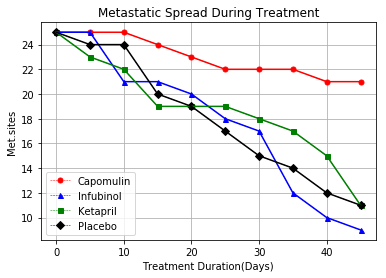

In [74]:
# Generate the Plot (Accounting for percentages)
x_axis=survival_pivot_df.index.values
y_capomulin=survival_pivot_df["Capomulin"]
y_Ifubinol=survival_pivot_df["Infubinol"]
y_Ketapril=survival_pivot_df["Ketapril"]
y_Placebo=survival_pivot_df["Placebo"]
#xerr=0.1
#yerr=pivot_meta_sem_df["Capomulin"]
fig, ax = plt.subplots()
ax.errorbar(x_axis, y_capomulin, color='red')
Capomulin,=plt.plot(x_axis,y_capomulin,color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Infubinol"]
ax.errorbar(x_axis, y_Infubinol, color='blue')
Infubinol,=plt.plot(x_axis,y_Infubinol,color="blue", marker='^',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Ketapril"]
ax.errorbar(x_axis, y_Ketapril, color='green')
Ketapril,=plt.plot(x_axis,y_Ketapril,color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)
yerr=pivot_meta_sem_df["Placebo"]
ax.errorbar(x_axis, y_Placebo, color='black')
Placebo,=plt.plot(x_axis,y_Placebo,color="black",marker='D', markersize=5, linestyle='--', linewidth=0.5)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival During Treatment')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best")
# Save the Figure
plt.savefig("Images/Metastatic.png")
#plt.tight_layout()
#plt.show()



## Summary Bar Graph

In [93]:
# Calculate the percent changes for each drug
tumor_percentage=((pivot_table.iloc[-1]-pivot_table.iloc[0])/pivot_table.iloc[0])*100

# Display the data to confirm
tumor_percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

(-19.475302667894173, 42.51649185589744, 46.12347172785187, 57.028794686606076, 53.92334713476923, 51.29796048315153, 47.24117486320637, -22.320900462766673, 52.085134287899024, 46.57975086509525)
[-19.475302667894173, -22.320900462766673]
[42.51649185589744, 46.12347172785187, 57.028794686606076, 53.92334713476923, 51.29796048315153, 47.24117486320637, 52.085134287899024, 46.57975086509525]


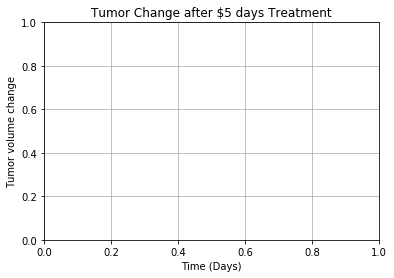

In [99]:
# Store all Relevant Percent Changes into a Tuple
tuple_percent=tuple(tumor_percentage)
print(tuple_percent)

passing=[]
failing=[]
# Splice the data between passing and failing drugs
#tuple_percent.apply(tuple,axis=1)
for i in tuple_percent:
    if i<0:
        passing.append(i)
    else:
        failing.append(i)
print(passing) 
print(failing)
  

# Orient widths. Add labels, tick marks, etc.
#x-axis=tumor_percentage[["Campoulin","Ceftamin","Infubinol","Ketapril"]]


# Use functions to label the percentages of changes


# Call functions to implement the function calls
plt.title('Tumor Change after $5 days Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor volume change')
plt.grid()
#plt.legend(loc="best")

# Save the Figure


# Show the Figure
fig.show()